<a href="https://colab.research.google.com/github/kyelea-boo/Bootcamp/blob/main/Proyek_Analisis_Data_Susi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Susi Angelina
- **Email:** mc827d5x0900@student.devacademy.id
- **ID Dicoding:** MC827D5X0900

## Menentukan Pertanyaan Bisnis

- Kategori apa saja yang memiliki volume pembelian tertinggi?
- Apa kategori produk yang memiliki rating tertinggi dan rating terendah?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
customers_df = pd.read_csv("/content/customers_dataset.csv")
geolocation_df = pd.read_csv("/content/geolocation_dataset.csv")
orderpayments_df = pd.read_csv("/content/order_payments_dataset.csv")
orderreviews_df = pd.read_csv("/content/order_reviews_dataset.csv")
orderitems_df = pd.read_csv("/content/order_items_dataset.csv")
orders_df = pd.read_csv("/content/orders_dataset.csv")
products_df = pd.read_csv("/content/products_dataset.csv")
productcategory_df = pd.read_csv("/content/product_category_name_translation.csv")
sellers_df = pd.read_csv("/content/sellers_dataset.csv")


**Insight:**
- Pada Gathering Data, akan dilakukan Load terhadap 9 dataset yang disediakan.

### Assessing Data

In [ ]:
Data = {
    'customers_df': customers_df,
    'geolocation_df': geolocation_df,
    'orderitems_df': orderitems_df,
    'orderpayments_df': orderpayments_df,
    'orderreviews_df': orderreviews_df,
    'orders_df': orders_df,
    'products_df': products_df,
    'productcategory_df': productcategory_df,
    'sellers_df': sellers_df
}

for name, df in Data.items():
    print(f"Data: {name} ")
    print(df.info())
    print("\n")

Data: customers_df 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


Data: geolocation_df 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3 

**Insight:**
- Pada tahapan Assesing Data juga dilakukan secara sekaligus untuk tiap dataset menggunakan for pada dictionary ("Data") yang sudah dibuat. Dari tahapan Assesing ini, dapat ditemukan beberapa missing value yang ada pada tabel tertentu.

In [ ]:

for name, df in Data.items():
    jumlah_duplikasi = df.duplicated().sum()
    print(f"\nData: {name}")
    print("Jumlah duplikasi:", jumlah_duplikasi)



Data: customers_df
Jumlah duplikasi: 0

Data: geolocation_df
Jumlah duplikasi: 261831

Data: orderitems_df
Jumlah duplikasi: 0

Data: orderpayments_df
Jumlah duplikasi: 0

Data: orderreviews_df
Jumlah duplikasi: 0

Data: orders_df
Jumlah duplikasi: 0

Data: products_df
Jumlah duplikasi: 0

Data: productcategory_df
Jumlah duplikasi: 0

Data: sellers_df
Jumlah duplikasi: 0


**Insight:**
- Pada bagian ini, saya melakukan pengecekan terhadap data yang sekiranya memiliki duplikasi.

In [ ]:
for name, df in Data.items():
    missing_values = df.isna().sum()
    print(f"\nData: {name}")
    print("Jumlah data kosong:", missing_values)


Data: customers_df
Jumlah data kosong: customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data: geolocation_df
Jumlah data kosong: geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Data: orderitems_df
Jumlah data kosong: order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Data: orderpayments_df
Jumlah data kosong: order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Data: orderreviews_df
Jumlah data kosong: review_id                      0
order_id                       0
review_score                   0
review_comment_titl

**Insight:**
- Pada bagian ini, saya melakukan pengecekan terhadap data yang sekiranya merupakan data yang menjadi missing value.

- Dari proses Assessing data ini, dapat diambil bahwa terdapat 1 dataset yang memiliki duplikasi yaitu pada dataset geolocation dengan jumlah duplikasi sebanyak 261831 data. Kemudian ada 3 dataset yang memiliki missing value yaitu pada dataset order_reviews sejumlah 145903 data, dataset orders sejumlah 4908 data, dan pada dataset products sejumlah 2448 data.

### Cleaning Data

In [ ]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

print(orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


**Insight:**
- pada bagian mengubah tipe data yang berhubungan dengan tanggal dan waktu menjadi datetime sebelum dilakukannya proses Cleaning Data.

In [ ]:
print("Jumlah duplikasi sebelum pembersihan:", Data["geolocation_df"].duplicated().sum())
Data["geolocation_df"] = Data["geolocation_df"].drop_duplicates()
print("Jumlah duplikasi setelah pembersihan:", Data["geolocation_df"].duplicated().sum())

Jumlah duplikasi sebelum pembersihan: 261831
Jumlah duplikasi setelah pembersihan: 0


**Insight:**
- Pada bagian ini, saya melakukan pembersihan untuk data yang mengalami duplikasi terlebih dahulu. Sebanyak 261831 data pada geolocation telah dihapus karena mengalami duplikasi.

In [ ]:
print("Data: orderreviews_df")
print(orderreviews_df.info())

Data: orderreviews_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


In [ ]:
print("Jumlah missing value sebelum pembersihan:")
print(Data["orderreviews_df"].isna().sum())

Data["orderreviews_df"]["review_comment_title"].fillna("No Comment", inplace=True)
Data["orderreviews_df"]["review_comment_message"].fillna("No Comment", inplace=True)

print("Jumlah missing value setelah pembersihan:")
print(Data["orderreviews_df"].isna().sum())

Jumlah missing value sebelum pembersihan:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Jumlah missing value setelah pembersihan:
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


<ipython-input-9-abdfbf77d325>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data["orderreviews_df"]["review_comment_title"].fillna("No Comment", inplace=True)
<ipython-input-9-abdfbf77d325>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

**Insight:**
- Sebanyak 145903 data missing value pada order reviews telah dibersihkan dengan mengganti missing value dengan "No Comment".

In [ ]:
print("Data: orders_df")
print(orders_df.info())

Data: orders_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


In [ ]:
print("Jumlah missing value sebelum pembersihan:")
print(Data["orders_df"].isna().sum())
Data["orders_df"] = Data["orders_df"].dropna(subset=["order_approved_at"])
print("Jumlah missing value setelah pembersihan:")
print(Data["orders_df"].isna().sum())

Jumlah missing value sebelum pembersihan:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Jumlah missing value setelah pembersihan:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1637
order_delivered_customer_date    2819
order_estimated_delivery_date       0
dtype: int64


**Insight:**
- Karena missing value belum dibersihkan secara sempurna maka saya menambahkan code dibawah ini


In [ ]:
Data["orders_df"]["order_delivered_carrier_date"].fillna(Data["orders_df"]["order_estimated_delivery_date"], inplace=True)
Data["orders_df"]["order_delivered_customer_date"].fillna(Data["orders_df"]["order_estimated_delivery_date"], inplace=True)
print("Jumlah missing value setelah pembersihan:")
print(Data["orders_df"].isna().sum())

Jumlah missing value setelah pembersihan:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


<ipython-input-12-4ee8b49401ec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data["orders_df"]["order_delivered_carrier_date"].fillna(Data["orders_df"]["order_estimated_delivery_date"], inplace=True)
<ipython-input-12-4ee8b49401ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["orders_df"]["order_delivered_carrier_date"].fillna(Dat

**Insight:**
- Dengan codingan tersebut, didapatlah dataset tanpa adanya missing value

In [ ]:
print("Jumlah missing value sebelum pembersihan:")
print(products_df.isna().sum())
products_df.dropna(subset=["product_category_name"], inplace=True)

num_cols = ["product_length_cm", "product_height_cm", "product_width_cm", "product_weight_g"]
for column in num_cols:
    products_df[column] = products_df[column].fillna(products_df[column].median())


print("Jumlah missing value setelah pembersihan:")
print(products_df.isna().sum())

Jumlah missing value sebelum pembersihan:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Jumlah missing value setelah pembersihan:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [ ]:
for name, df in Data.items():
    print(f"Data: {name} ")
    print(df.info())
    print("\n")

Data: customers_df 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


Data: geolocation_df 
<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocati

**Insight:**
- Setelah proses Cleaning Data dilakukan, dapat diperhatikan bahwa tidak ada lagi data yang memiliki missing values ataupun duplikasi.

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [ ]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
customers_df.customer_id.is_unique

True

In [ ]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [ ]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Explore `geolocation_df`

In [ ]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [ ]:
geolocation_df.geolocation_zip_code_prefix.is_unique

False

In [ ]:
geolocation_df.geolocation_zip_code_prefix.duplicated

<bound method Series.duplicated of 0           1037
1           1046
2           1046
3           1041
4           1035
           ...  
1000158    99950
1000159    99900
1000160    99950
1000161    99980
1000162    99950
Name: geolocation_zip_code_prefix, Length: 1000163, dtype: int64>

In [ ]:
geolocation_df.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

,geolocation_zip_code_prefix
geolocation_city,
sao paulo,3171
são paulo,3013
brasilia,496
brasília,406
rio de janeiro,404
...,...
guarei,1
guardinha,1
guarda-mor,1


In [ ]:
geolocation_df.groupby(by="geolocation_state").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

,geolocation_zip_code_prefix
geolocation_state,
SP,6349
MG,1868
RJ,1390
RS,1132
PR,1046
BA,992
GO,773
SC,620
PE,596


### Explore `orderitems_df`

In [ ]:
orderitems_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [ ]:
orderitems_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
96824,dbb728f551a0cd006a52d16c47834040,1,e2883845d83ecea7f341705fafdfd19c,897060da8b9a21f655304d50fd935913,2018-03-01 19:35:28,40.30,15.10
52980,7892a566b076a8f7248d0c39b1a62768,1,94475071013412139f862c0bd7e3bb37,955fee9216a65b617aa5c0531780ce60,2018-03-01 18:47:24,39.99,15.79
76188,ad7b0c3373368e658cc9cf31893c6413,1,0e40b1ed4cfd3da1962ec91913e54ba8,8b321bb669392f5163d04c59e235e066,2018-07-17 17:10:11,13.65,12.79
93525,d3fc45461660252856d603ed31eb4e77,1,797897e182469fff3c330560d2fc851f,d63c73efd41eb002280e7ec831424edb,2017-11-27 03:59:21,2899.00,39.17
103391,ead0bec6842006b655fed967de837883,1,c413fa08b405af6edb9d49e85e241c08,b76dba6c951ab00dc4edf0a1aa88037e,2017-03-13 04:10:34,12.97,14.52


In [ ]:
orderitems_df.order_id.is_unique

False

In [ ]:
orderitems_df.order_id.duplicated

<bound method Series.duplicated of 0         00010242fe8c5a6d1ba2dd792cb16214
1         00018f77f2f0320c557190d7a144bdd3
2         000229ec398224ef6ca0657da4fc703e
3         00024acbcdf0a6daa1e931b038114c75
4         00042b26cf59d7ce69dfabb4e55b4fd9
                        ...               
112645    fffc94f6ce00a00581880bf54a75a037
112646    fffcd46ef2263f404302a634eb57f7eb
112647    fffce4705a9662cd70adb13d4a31832d
112648    fffe18544ffabc95dfada21779c9644f
112649    fffe41c64501cc87c801fd61db3f6244
Name: order_id, Length: 112650, dtype: object>

In [ ]:
orderitems_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


In [ ]:
orderitems_df.sort_values(by="freight_value", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.00,409.68
28044,3fde74c28a3d5d618c00f26d51baafa0,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-22 03:15:09,2338.08,375.28
3303,076d1555fb53a89b0ef4d529e527a0f6,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-07 04:35:22,2338.08,375.28
69797,9f49bd16053df810384e793386312674,1,256a9c364b75753b97bee410c9491ad8,5c030029b5916fed0986310385ec9009,2018-08-02 03:44:28,1149.00,339.59
16731,264a7e199467906c0727394df82d1a6a,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,2018-04-23 17:15:10,1050.00,338.30
...,...,...,...,...,...,...,...
25980,3b10c12d389da3bd306ab31f1867c754,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-02 20:31:14,99.90,0.00
23857,365929ae2a3877d3590589ad75b39d20,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-14 20:54:48,99.90,0.00
107758,f4e4e886a056bb9c7ed4a19c013a833d,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-09 16:29:23,99.90,0.00
74348,a968af310ab09611023e0efd828ecbde,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-17 17:50:55,115.00,0.00


### Explore `orderpayments_df`

In [ ]:
orderpayments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
41930,9f35328dc92b28c67517b812818dc6a8,1,credit_card,6,1243.62
92770,eb1fef50749c960bb52e6b27761970fa,1,boleto,1,28.29
100367,44001fa5bde42ef2bb752eab4c9dde60,2,voucher,1,32.26
21572,d4cb1c0045dd65ebfe15e14c4d083281,1,credit_card,4,93.65
17742,2b8707bd8d89fbfd17af1dc3373c2875,1,credit_card,9,97.74


In [ ]:
orderpayments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
orderpayments_df.order_id.is_unique

False

In [ ]:
orderpayments_df.order_id.duplicated

<bound method Series.duplicated of 0         b81ef226f3fe1789b1e8b2acac839d17
1         a9810da82917af2d9aefd1278f1dcfa0
2         25e8ea4e93396b6fa0d3dd708e76c1bd
3         ba78997921bbcdc1373bb41e913ab953
4         42fdf880ba16b47b59251dd489d4441a
                        ...               
103881    0406037ad97740d563a178ecc7a2075c
103882    7b905861d7c825891d6347454ea7863f
103883    32609bbb3dd69b3c066a6860554a77bf
103884    b8b61059626efa996a60be9bb9320e10
103885    28bbae6599b09d39ca406b747b6632b1
Name: order_id, Length: 103886, dtype: object>

In [ ]:
orderpayments_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66
...,...,...,...,...,...
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00


In [ ]:
orderpayments_df.sort_values(by="payment_installments", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
60027,ef71772d55431467890fda2f45c7bdde,1,credit_card,24,629.64
55094,fcbb6af360b31b05460c2c8e524588c0,1,credit_card,24,1194.38
21713,6ae2e8b8fac02522481d2a2f4ca4412c,1,credit_card,24,433.43
50401,ffb18bf111fa70edf316eb0390427986,1,credit_card,24,617.24
2970,70b7e94ea46d3e8b5bc12a50186edaf0,1,credit_card,24,274.84
...,...,...,...,...,...
46147,a2ade02b971edbc56f74ca5ee48e766e,1,boleto,1,110.13
46146,628fedcd693f3b7d66306884d2c043c6,1,credit_card,1,46.02
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69


In [ ]:
print(orderpayments_df[['payment_value', 'payment_installments']].sort_values(by="payment_installments", ascending=False))

        payment_value  payment_installments
60027          629.64                    24
55094         1194.38                    24
21713          433.43                    24
50401          617.24                    24
2970           274.84                    24
...               ...                   ...
46147          110.13                     1
46146           46.02                     1
103885         191.58                     1
46982           58.69                     0
79014          129.94                     0

[103886 rows x 2 columns]


### Explore `orderreviews_df`

In [ ]:
orderreviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
79146,a3023f0db7bc18e41800477235e93ce4,3b43ab87914ebf7fd563557362108ebd,5,No Comment,No Comment,2017-12-19 00:00:00,2017-12-22 16:17:47
80760,99c201de78fcc34e1164a3c15ad03b75,bf5df6110fa6b9de1ed64e327a25396d,3,No Comment,No Comment,2018-01-31 00:00:00,2018-02-04 17:51:05
16938,f6fec4a96093ba4734c285881de0e4ee,a81be81673bee4a384c6b5468a606478,5,No Comment,Melhor do Brasil,2017-11-22 00:00:00,2017-11-29 21:32:17
35188,048133b8b6b1dc932a3c2291efa35309,11d2a4111b0de56991e1ccbeaf4eb0e8,5,No Comment,Entregue antes do prazo previsto!,2017-03-22 00:00:00,2017-03-23 02:31:22
90645,68a33cc1a8af587dc3c7673e7b301a33,6ca63d606e504f859e56df4534878101,4,No Comment,No Comment,2018-04-26 00:00:00,2018-04-26 22:51:01


In [ ]:
orderreviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Comment,No Comment,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [ ]:
orderreviews_df.order_id.is_unique

False

In [ ]:
orderreviews_df.order_id.duplicated

<bound method Series.duplicated of 0        73fc7af87114b39712e6da79b0a377eb
1        a548910a1c6147796b98fdf73dbeba33
2        f9e4b658b201a9f2ecdecbb34bed034b
3        658677c97b385a9be170737859d3511b
4        8e6bfb81e283fa7e4f11123a3fb894f1
                       ...               
99219    2a8c23fee101d4d5662fa670396eb8da
99220    22ec9f0669f784db00fa86d035cf8602
99221    55d4004744368f5571d1f590031933e4
99222    7725825d039fc1f0ceb7635e3f7d9206
99223    90531360ecb1eec2a1fbb265a0db0508
Name: order_id, Length: 99224, dtype: object>

In [ ]:
print(orderreviews_df[['order_id', 'review_score']].sort_values(by="review_score", ascending=False))

                               order_id  review_score
81664  067546963d2dc6275eb550df0482c460             5
41507  b3a0eb2ed8d1c40cb723235fc937b654             5
41493  0997090fe6882d45c6a71660aaffaba2             5
76470  bd9c7d72943c5118f03bb7524043e0fd             5
41496  a34caabc66a97d7d5228c0c98789ea62             5
...                                 ...           ...
88349  3162e7a4bd72ecb02f89eba7df43673e             1
73809  5541bd42a3108b24d82380b08016016c             1
88351  562f45bf4a946810053214c29d752e85             1
46329  67b0f3d0a405fc007841f73f2792323b             1
99223  90531360ecb1eec2a1fbb265a0db0508             1

[99224 rows x 2 columns]


### Explore `orders_df`

In [ ]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
31663,1dbed8d8827e4f91dfbb03ce97b38109,ab836f077c0bfd95a66b4ef495d3234d,delivered,2018-03-19 17:40:34,2018-03-21 02:50:33,2018-03-27 20:36:59,2018-04-02 14:12:13,2018-04-05
25695,d3838a24843870a5ec06d16bcf45bbdd,df616b558a4fd57856183451db38cbbd,delivered,2018-08-14 16:13:53,2018-08-14 16:25:18,2018-08-15 14:07:00,2018-08-20 20:27:24,2018-08-24
61907,4a6de68c76257d69209af11ba0e56fa1,5206bdc4d7ecb9869166f99fc635a5b1,delivered,2018-01-05 16:19:33,2018-01-05 16:29:23,2018-01-08 17:14:54,2018-01-10 21:27:01,2018-01-30
8213,c8111f39ce798f7761d4f6e8f0c3a665,76fdaa48984220f3067ba4a59725a18f,delivered,2017-05-05 00:16:57,2017-05-06 02:22:56,2017-05-08 11:44:03,2017-05-22 16:32:50,2017-06-09
28851,e153a0dcb8018427c43753f0e1edba6e,d226fa8846cd0fb905b59b9dcff9002d,delivered,2017-11-21 23:43:12,2017-11-22 23:48:26,2017-11-25 17:23:12,2017-12-08 21:54:33,2017-12-07


In [ ]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_approved_at"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [ ]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
16101,ef814f60d8d32909ecb19879c24c1f53,980847fe0ca85c2ea11845f1b1635a15,delivered,2018-06-23 17:45:15,2018-06-23 17:55:54,2018-06-27 15:31:00,2018-06-30 11:48:53,2018-07-23,7.0
2955,6014de3ed0a310e59ac664e276af54eb,71d824a92863847504035325c4865f7e,delivered,2017-03-05 16:46:02,2017-03-07 03:43:17,2017-03-07 10:50:08,2017-03-13 18:52:03,2017-03-27,7.0
31651,abd0736f947aa672d9254ad3cfaca4ff,494e06598140699017261a37e250cc52,delivered,2017-07-02 16:32:13,2017-07-02 16:43:53,2017-07-03 18:22:10,2017-07-18 17:45:57,2017-08-04,16.0
4354,5d2d00e8bfcca1d76a0335b147b1d020,0d10a0cda45ad0f4447a6dba4390b09d,delivered,2017-12-09 20:39:25,2017-12-12 03:49:33,2017-12-12 23:41:33,2017-12-28 15:42:25,2018-01-11,16.0
27751,20e2af2e88f87028e067d8f71a7ea84e,cf1b464894e6177033533c076c2ed5af,delivered,2018-07-25 21:12:01,2018-07-25 21:25:14,2018-07-26 13:27:00,2018-07-30 21:36:32,2018-08-08,5.0


In [ ]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96462.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,12.119892
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-7.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,6.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,15.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,209.000000


In [ ]:
customer_id_in_orders_df =  set(orders_df["customer_id"])
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
16911,f14c14c6129468981840deb6b0474ba0,0b366bcd927bbe310de8ea00f1cf5bbf,13145,paulinia,SP,Active
69974,dd502b57abd7ac93f33959fd9cc88348,0895c61a77b305efdfad13596c749c60,13088,campinas,SP,Active
74100,5a0ed2fa7a5c4f4e5105626fe1b0fe11,c66f6a3f46c648e098459bf6b577287f,2855,sao paulo,SP,Active
86178,2cf1f882e75cada6060e4e5405439910,9a98052659896bac957d8fdc685e0bee,8574,itaquaquecetuba,SP,Active
5244,af9608d0d237700c68fac0a2003654eb,bc12afff5cbebffadc0e7f4aa470ddc0,85945,tupassi,PR,Active


In [ ]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,99441


### Explore `productcategory_df`

In [ ]:
productcategory_df.sample(5)

,product_category_name,product_category_name_english
27,construcao_ferramentas_jardim,costruction_tools_garden
66,flores,flowers
42,moveis_sala,furniture_living_room
9,relogios_presentes,watches_gifts
53,pcs,computers


In [ ]:
productcategory_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Explore `products_df`

In [ ]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
30121,2cfd372900c7c65e4c4ed2ccf7a1cfd4,relogios_presentes,35.0,694.0,1.0,550.0,18.0,12.0,13.0
9355,78f4d68e23999ab9ed8c249e3662e132,fashion_bolsas_e_acessorios,36.0,826.0,1.0,100.0,16.0,5.0,16.0
22025,be9bda3f5667ecd07de6d194b60ddc01,esporte_lazer,35.0,713.0,1.0,4000.0,85.0,13.0,23.0
9256,3fc389e2eb3142d4050cc178c82de0a4,moveis_decoracao,46.0,1091.0,1.0,900.0,30.0,30.0,30.0
13301,eb9b44e05684527fbfdfd0ff5cb86250,beleza_saude,20.0,873.0,3.0,400.0,18.0,9.0,28.0


In [ ]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341,32341,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000
unique,32341,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.907826,30.854364,16.958690,23.208497
std,NaN,NaN,10.245741,635.115225,1.736766,4279.234668,16.955734,13.635922,12.078589
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [ ]:
customers_df.customer_id.is_unique

True

In [ ]:
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
casa_conforto_2,5
fashion_roupa_infanto_juvenil,5
pc_gamer,3


### Explore `sellers_df`

In [ ]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
518,ea846a0e7ad98a741783e886d89dfa44,16072,aracatuba,SP
704,00ab3eff1b5192e5f1a63bcecfee11c8,4164,sao paulo,SP
2261,89ad3263c0931c47f976d7c5778e60f6,5127,sao paulo,SP
2965,9ac4f14370b1e24ddc58be041b7f99df,76330,jaragua,GO
1093,681fce914360217db47784ae28905a96,83709,araucaria,PR


In [ ]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [ ]:
sellers_df.seller_id.is_unique

True

In [ ]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


In [ ]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


### Explore `orders_df` & `orderitems_df`

In [ ]:
ordered_items_df = pd.merge(
    left=orders_df,
    right=orderitems_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
ordered_items_df.head(10)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,17.0,1.0,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,NaN,1.0,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,10.0,1.0,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.99,15.17
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,8.0,1.0,ac1789e492dcd698c5c10b97a671243a,63b9ae557efed31d1f7687917d248a8d,2017-01-27 18:29:09,19.90,16.05
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,18.0,1.0,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,2017-08-11 12:05:32,149.99,19.77


In [ ]:
ordered_items_df.groupby(by="product_id").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="order_id", ascending=False)

,order_id,price
product_id,,
99a4788cb24856965c36a24e339b6058,467,43025.56
aca2eb7d00ea1a7b8ebd4e68314663af,431,37608.90
422879e10f46682990de24d770e7f83d,352,26577.22
d1c427060a0f73f6b889a5c7c61f2ac4,323,47214.51
389d119b48cf3043d311335e499d9c6b,311,21440.59
...,...,...
69c58bb97c8d7b75fad9e6c1d391fda6,1,105.30
69c3a9ec3f1094ad11505df27ddad569,1,69.50
69c2f05e34d543dc71cfe745bfac8499,1,89.90


**Insight:**
- Bagian ini, digunakan untuk merge datadet order dengan orderitems untuk mengetahui produk apasaja yang dibeli oleh konsumen dengan menggabungkannya menggunakan order_id.

### Explore `orders_df` & `customers_df`

In [ ]:
customers_orders_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head(10)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,17.0,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,Active
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,NaN,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,Active
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,10.0,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,Active
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,8.0,39382392765b6dc74812866ee5ee92a7,99655,faxinalzinho,RS,Active
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,18.0,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,Active


In [ ]:
customers_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Explore `orderitems_df` & `products_df`

In [ ]:
ordered_products_df = pd.merge(
    left=orderitems_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
ordered_products_df.head(10)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,utilidades_domesticas,36.0,558.0,1.0,450.0,24.0,8.0,15.0
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,telefonia,52.0,815.0,1.0,200.0,27.0,5.0,20.0
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,ferramentas_jardim,39.0,1310.0,3.0,13805.0,35.0,75.0,45.0
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,beleza_saude,59.0,493.0,1.0,2000.0,30.0,12.0,16.0
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,livros_tecnicos,52.0,1192.0,1.0,850.0,29.0,3.0,21.0


In [ ]:
ordered_products_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="order_id", ascending=False)

,order_id,price
product_category_name,,
cama_mesa_banho,9417,1036988.68
beleza_saude,8836,1258681.34
esporte_lazer,7720,988048.97
informatica_acessorios,6689,911954.32
moveis_decoracao,6449,729762.49
...,...,...
la_cuisine,13,2054.99
cds_dvds_musicais,12,730.00
pc_gamer,8,1545.95


In [ ]:
customers_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight:**
- Pada bagian ini, kita melakukan merge pada dataset order items dengan dataset product dengan menggunakan product_id, dengan merge ini kita dapat mengetahui kategori produk berdasarkan pada product_id dan product apa saja yang sudah dibeli oleh konsumen.

### Explore `ordered_products_by_customers`

In [ ]:
ordered_products_by_customers_df = pd.merge(
    left=ordered_items_df,
    right=ordered_products_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
ordered_products_by_customers_df.head(10)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id_x,...,price_y,freight_value_y,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,1.0,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1.0,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,1.0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1.0,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,17.0,1.0,...,147.90,27.36,automotivo,49.0,608.0,1.0,7150.0,65.0,10.0,65.0
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,NaN,1.0,...,49.90,16.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,10.0,1.0,...,59.99,15.17,automotivo,59.0,956.0,1.0,50.0,16.0,16.0,17.0
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,8.0,1.0,...,19.90,16.05,moveis_decoracao,41.0,432.0,2.0,300.0,35.0,35.0,15.0
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,18.0,1.0,...,149.99,19.77,moveis_escritorio,45.0,527.0,1.0,9750.0,42.0,41.0,42.0


In [ ]:
ordered_products_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="order_id", ascending=False)

,order_id,price
product_category_name,,
cama_mesa_banho,9417,1036988.68
beleza_saude,8836,1258681.34
esporte_lazer,7720,988048.97
informatica_acessorios,6689,911954.32
moveis_decoracao,6449,729762.49
...,...,...
la_cuisine,13,2054.99
cds_dvds_musicais,12,730.00
pc_gamer,8,1545.95


**Insight:**
- Pada explorasi ini, sudah merupakan dataset final yang akan digunakan untuk visualisasi data pertanyaan no1. Dimana dataset ini sudah memuat data yang dibutuhkan untuk visualisasi datanya yaitu kategori produk beserta dengan jumlah pembeliannya secara keseluruhan.

### Explore `orderreviews_df` & `ordered_products_df`

In [ ]:
customers_reviews_products_df = pd.merge(
    left=orderreviews_df,
    right=ordered_products_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_reviews_products_df.head(10)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Comment,No Comment,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Comment,No Comment,2018-01-18 00:00:00,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Comment,No Comment,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,79.79,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Comment,No Comment,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,149.00,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Comment,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,179.99,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0
5,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Comment,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,...,1199.00,134.25,esporte_lazer,48.0,562.0,5.0,9850.0,105.0,35.0,50.0
6,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,No Comment,No Comment,2018-04-13 00:00:00,2018-04-16 00:39:37,1.0,c45d02cc82cd779835094de9b29272cb,da8622b14eb17ae2831f4ac5b9dab84a,...,99.90,13.20,cama_mesa_banho,57.0,246.0,2.0,950.0,46.0,6.0,36.0
7,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,No Comment,No Comment,2018-04-13 00:00:00,2018-04-16 00:39:37,2.0,c45d02cc82cd779835094de9b29272cb,da8622b14eb17ae2831f4ac5b9dab84a,...,99.90,13.20,cama_mesa_banho,57.0,246.0,2.0,950.0,46.0,6.0,36.0
8,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,No Comment,No Comment,2018-04-13 00:00:00,2018-04-16 00:39:37,3.0,4e3550b4ebca5e32ccc3d32b3470e31f,41ab63a91b8b264e8c8780368bf1dd5b,...,119.00,4.40,cama_mesa_banho,30.0,568.0,1.0,900.0,17.0,22.0,17.0
9,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,No Comment,No Comment,2018-04-13 00:00:00,2018-04-16 00:39:37,4.0,c45d02cc82cd779835094de9b29272cb,da8622b14eb17ae2831f4ac5b9dab84a,...,99.90,13.20,cama_mesa_banho,57.0,246.0,2.0,950.0,46.0,6.0,36.0


In [ ]:
customers_reviews_products_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

,review_id
review_score,
5,56910
4,19007
1,11282
3,8097
2,3114


**Insight:**
- Pada explorasi data kali ini, kita merge review konsumen dengan dataset produk menggunakan order_id karena pada explorasi data sebelumnya (ordered_products_df, kita sudah menggabungkan data order items dataset dengan product dataset menggunakan product_id) agar kita mendapat informasi kategori produk.  

### Explore `product_reviews_df`

In [ ]:
product_reviews_df = customers_reviews_products_df.merge(productcategory_df, on="product_category_name", how="left")
product_reviews_df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Comment,No Comment,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Comment,No Comment,2018-01-18 00:00:00,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Comment,No Comment,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0,computers_accessories
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Comment,No Comment,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Comment,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0,garden_tools
5,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Comment,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,...,134.25,esporte_lazer,48.0,562.0,5.0,9850.0,105.0,35.0,50.0,sports_leisure
6,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,No Comment,No Comment,2018-04-13 00:00:00,2018-04-16 00:39:37,1.0,c45d02cc82cd779835094de9b29272cb,da8622b14eb17ae2831f4ac5b9dab84a,...,13.20,cama_mesa_banho,57.0,246.0,2.0,950.0,46.0,6.0,36.0,bed_bath_table
7,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,No Comment,No Comment,2018-04-13 00:00:00,2018-04-16 00:39:37,2.0,c45d02cc82cd779835094de9b29272cb,da8622b14eb17ae2831f4ac5b9dab84a,...,13.20,cama_mesa_banho,57.0,246.0,2.0,950.0,46.0,6.0,36.0,bed_bath_table
8,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,No Comment,No Comment,2018-04-13 00:00:00,2018-04-16 00:39:37,3.0,4e3550b4ebca5e32ccc3d32b3470e31f,41ab63a91b8b264e8c8780368bf1dd5b,...,4.40,cama_mesa_banho,30.0,568.0,1.0,900.0,17.0,22.0,17.0,bed_bath_table
9,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,No Comment,No Comment,2018-04-13 00:00:00,2018-04-16 00:39:37,4.0,c45d02cc82cd779835094de9b29272cb,da8622b14eb17ae2831f4ac5b9dab84a,...,13.20,cama_mesa_banho,57.0,246.0,2.0,950.0,46.0,6.0,36.0,bed_bath_table


In [ ]:
category_reviews = product_reviews_df.groupby("product_category_name_english")["review_score"].mean().reset_index()
category_reviews_sorted = category_reviews.sort_values(by="review_score", ascending=False)
category_reviews_sorted.head(10)

,product_category_name_english,review_score
11,cds_dvds_musicals,4.642857
29,fashion_childrens_clothes,4.500000
8,books_general_interest,4.446266
22,costruction_tools_tools,4.444444
35,flowers,4.419355
9,books_imported,4.400000
10,books_technical,4.368421
37,food_drink,4.315412
53,luggage_accessories,4.315257
64,small_appliances_home_oven_and_coffee,4.302632


In [ ]:
category_reviews_sorted.tail(10)

,product_category_name_english,review_score
4,audio,3.825485
41,furniture_mattress_and_upholstery,3.815789
27,fashio_female_clothing,3.780000
58,party_supplies,3.767442
34,fixed_telephony,3.683206
30,fashion_male_clothing,3.641221
46,home_comfort_2,3.629630
57,office_furniture,3.493183
23,diapers_and_hygiene,3.256410
61,security_and_services,2.500000


**Insight:**
- Pada explorasi data ini, yaitu merge dataset yang sudah dimerge sebelumnya mengenai review konsumen dengan produk, dan pada part ini kita merge datanya agar memperoleh kategori produk dalam bahasa Inggris karena sebelum masih belum bahasa Inggris. Merge ini sudah menjadi final dataset untuk digunakan pada Pertanyaan ke2.

<ipython-input-81-b0351f1db1ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2017["month"] = orders_2017["order_purchase_timestamp"].dt.month


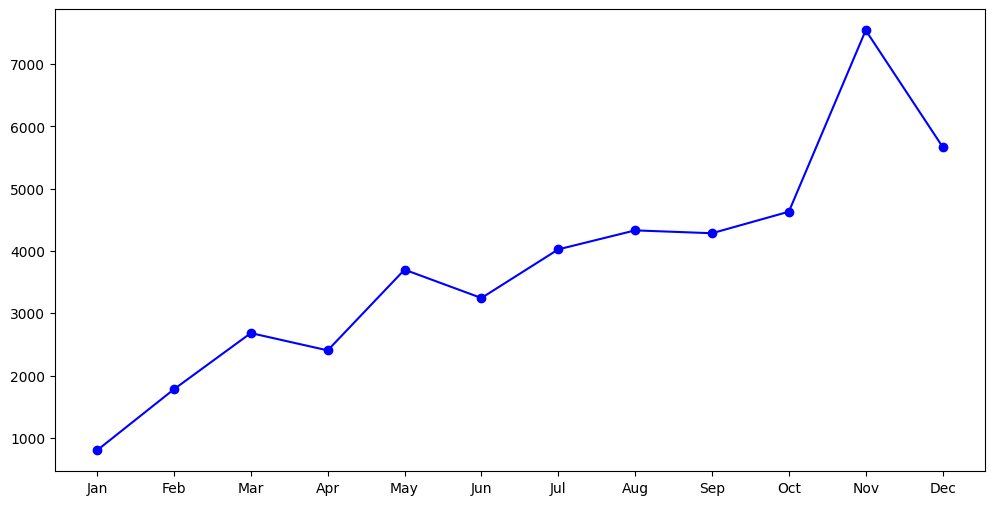

In [ ]:
orders_2017 = orders_df[orders_df["order_purchase_timestamp"].dt.year == 2017]
orders_2017["month"] = orders_2017["order_purchase_timestamp"].dt.month
orders_per_month_2017 = orders_2017.groupby("month")["order_id"].count().reset_index()
month_labels = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
                7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
orders_per_month_2017["month"] = orders_per_month_2017["month"].map(month_labels)
orders_per_month_2017 = orders_per_month_2017.sort_values(by="month", key=lambda x: pd.Categorical(x, categories=month_labels.values(), ordered=True))
plt.figure(figsize=(12, 6))
plt.plot(orders_per_month_2017["month"], orders_per_month_2017["order_id"], marker="o", linestyle="-", color="b")


## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa saja yang memiliki volume pembelian tertinggi?

In [ ]:
ordered_products_by_customers_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id_x,...,price_y,freight_value_y,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
101022,a8c5b9c0a36fb5d42f41d29dc808c0a8,23723779ba40a7f7887608d06897c432,delivered,2018-04-22 17:36:31,2018-04-24 18:22:07,2018-04-24 23:21:58,2018-04-26 23:28:43,2018-05-11,2.0,1.0,...,54.40,8.88,casa_construcao,57.0,565.0,4.0,800.0,38.0,38.0,22.0
84723,0f678c7e594e9fd0203bb134c9bdf778,636fc788dff5948716dfe026ba361b98,delivered,2018-01-13 20:30:18,2018-01-13 20:39:26,2018-01-16 15:16:14,2018-01-18 22:10:03,2018-02-01,5.0,2.0,...,20.90,9.34,beleza_saude,57.0,1123.0,1.0,500.0,26.0,6.0,21.0
49359,6318d8c5f6857de384c0b3186d036457,e16043b6c48d4fcfcf5500300001a665,delivered,2017-06-08 20:02:41,2017-06-09 19:55:14,2017-06-13 14:38:45,2017-06-26 13:08:19,2017-07-14,17.0,1.0,...,179.99,26.54,perfumaria,59.0,827.0,2.0,500.0,20.0,13.0,20.0
71632,c87482c77931bd39e99e46dd2a7013d2,8e143bd17293b4a7d8ad77b56995d8f3,delivered,2018-05-05 11:05:51,2018-05-05 11:15:14,2018-05-08 12:46:00,2018-05-10 01:33:15,2018-05-28,5.0,3.0,...,45.00,14.87,moveis_decoracao,52.0,267.0,1.0,5600.0,30.0,30.0,30.0
57662,6aeec0cf09e8cd90c75cdd0ece396867,84106b0fd15d17c59d5bd961521b443a,delivered,2017-10-08 22:49:59,2017-10-08 23:13:58,2017-10-16 21:14:55,2017-10-24 16:47:57,2017-11-01,16.0,1.0,...,35.90,14.10,esporte_lazer,32.0,3831.0,1.0,150.0,16.0,16.0,11.0
38058,11b6318ec732b94b5593c66ef1f37863,2eeafd9d0467198f7d94fabf020d86e1,delivered,2018-05-16 10:47:06,2018-05-16 11:19:00,2018-05-17 13:07:00,2018-05-18 22:12:44,2018-05-24,2.0,1.0,...,23.90,8.29,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0
86160,26b5b516adaae71986064b4cd22076b3,53eb1634b3c95c9f1766f592058115d9,delivered,2018-07-24 23:42:05,2018-07-26 03:15:19,2018-07-26 13:49:00,2018-07-30 16:04:49,2018-08-21,5.0,1.0,...,69.99,15.59,informatica_acessorios,33.0,1127.0,2.0,450.0,16.0,4.0,20.0
123611,4e1d5bf07ad851a6470d6b28cfd1f1e6,b19ab8d36d0de6602c4f57aa41e8dabb,delivered,2017-01-30 18:19:23,2017-01-31 20:31:32,2017-02-02 13:58:06,2017-02-09 10:17:57,2017-03-28,9.0,1.0,...,20.90,50.00,informatica_acessorios,33.0,1084.0,2.0,200.0,41.0,2.0,29.0
76226,545c81f766ce4811ebecb78efc1a665a,c0283e476e89b2f1eb034beb4a2b4b6d,delivered,2017-09-20 15:56:25,2017-09-22 20:05:34,2017-10-02 18:53:49,2017-10-07 16:17:17,2017-10-05,15.0,2.0,...,29.90,9.09,moveis_decoracao,47.0,2127.0,1.0,500.0,46.0,19.0,15.0
151090,684497197738631cbe11c77e531a3220,04d134f760aef9a8a167cb60f55b9261,delivered,2017-11-24 10:28:02,2017-11-25 04:30:49,2017-11-28 20:59:03,2017-11-30 15:38:52,2017-12-19,5.0,2.0,...,89.90,11.64,cama_mesa_banho,58.0,188.0,1.0,1650.0,44.0,2.0,35.0


In [ ]:
top_10_products = ordered_products_by_customers_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "price_y": "sum"
}).sort_values(by="order_id", ascending=False).head(10)

<ipython-input-77-8bae2712c621>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


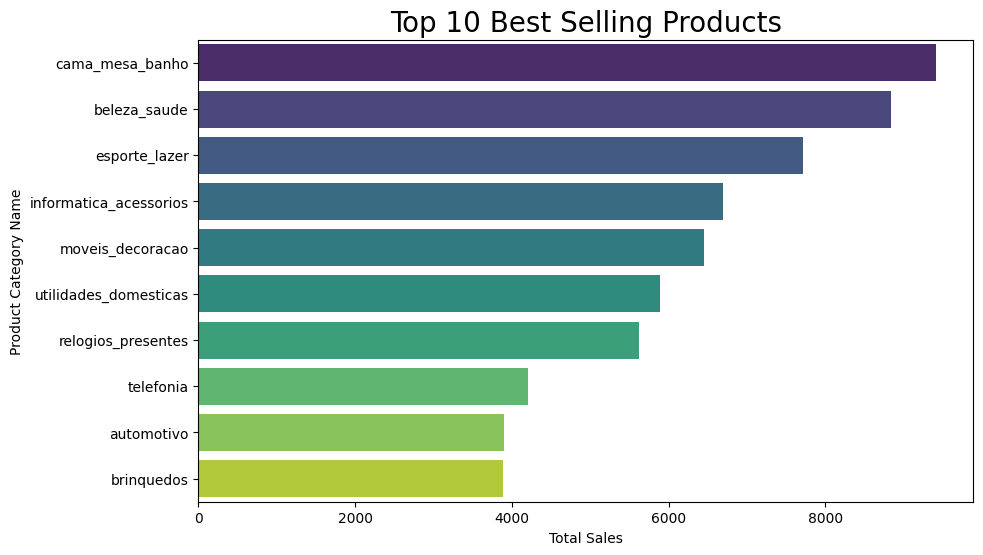

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="order_id",
    y="product_category_name",
    data=top_10_products,
    palette="viridis"
)
plt.title("Top 10 Best Selling Products", loc="center", fontsize=20)
plt.xlabel('Total Sales')
plt.ylabel('Product Category Name')
plt.show()

**Insight:**
- Pada bagian ini merupakan hasil dari visualisasi data pada pertanyaan pertama, yaitu produk apa saja yang menjadi produk dengan pembelian tertinggi. Pada visualisasi ini saya mengambil 10 produk yang paling sering dibeli.

### Pertanyaan 2: Apa kategori produk yang memiliki rating tertinggi dan rating terendah?

In [ ]:
top_10_products_by_review = category_reviews_sorted.head(10)
top_10_lowest_rating_products = category_reviews_sorted.tail(10)

<ipython-input-92-f0180227c844>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_lowest_rating_products["Kategori"] = "Lowest 10"


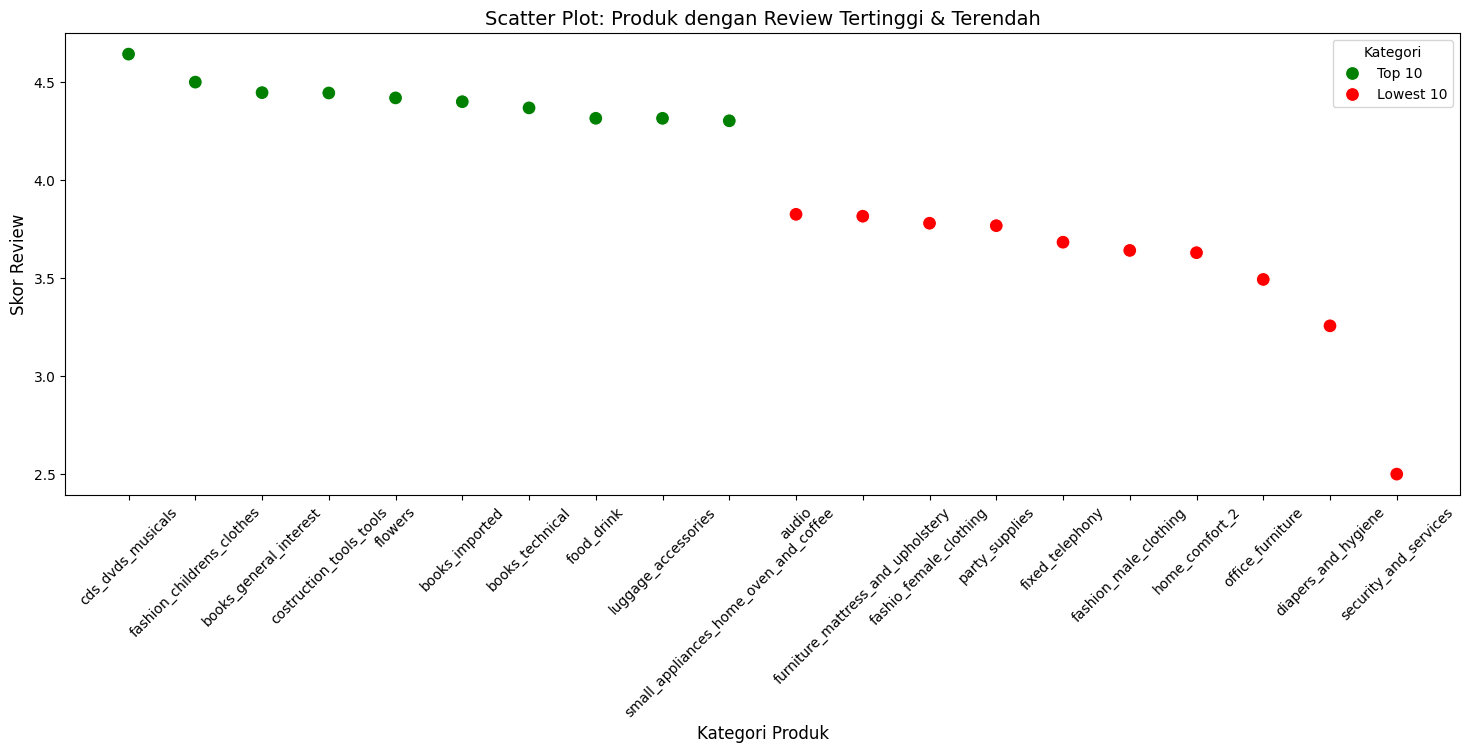

In [ ]:
top_10_products_by_review["Kategori"] = "Top 10"
top_10_lowest_rating_products["Kategori"] = "Lowest 10"
combined_data = pd.concat([top_10_products_by_review, top_10_lowest_rating_products])

plt.figure(figsize=(18, 6))
sns.scatterplot(
    x=combined_data["product_category_name_english"],
    y=combined_data["review_score"],
    hue=combined_data["Kategori"],
    palette={"Top 10": "green", "Lowest 10": "red"},
    s=100
)

plt.xticks(rotation=45)  # Memutar label kategori produk agar mudah dibaca
plt.title("Scatter Plot: Produk dengan Review Tertinggi & Terendah", fontsize=14)
plt.xlabel("Kategori Produk", fontsize=12)
plt.ylabel("Skor Review", fontsize=12)
plt.legend(title="Kategori", loc="upper right")

**Insight:**
- Pada bagian ini merupakan visualisasi data pada pertanyaan kedua yang membahas manakah produk yang memiliki rating tertinggi dan terendah secara keseluruhan berdasarkan pada mean review score dari pelanggan. Saya menampilkan data Lowest Rating dan Highest Rating sekaligus.

## Conclusion

- Untuk kesimpulan pada pertanyaan pertama yaitu kita dapat melihat dari sekian banyak kategori produk yang ada pada dataset diberikan, 10 nama tersebut lah yang memiliki tingkat pembelian tertinggi. Tingkat pembelian ini berbeda dari pertanyaan kedua yang dimana ini hanya membahas volume pembelian produk, sedangkan pertanyaan kedua akan membahas produk berdasarkan rating konsumen.

- Untuk kesimpulan pada pertanyaan kedua yaitu kita dapat memperoleh kesimpulan mengenai 10 produk dengan rating tertinggi dan 10 produk dengan rating terendah berdasarkan dari review score konsumen. Dimana dengan adanya analisis mengenai hal ini, kita dapat lebih memperhatikan produk yang memiliki rating terendah.